In [35]:
%matplotlib inline
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pylab as plt
import cv2
import os
import random
from scipy.ndimage import convolve
from IPython.display import display
from PIL import Image
from skimage.io import imread,imshow
from skimage.filters import prewitt_h,prewitt_v

In [27]:
ipath = '/Users/yusuf/Downloads/julius-maada-1.jpeg'

ipath = '/Users/yusuf/Downloads/rsz_img-20210307-wa0052.png'
img =  image.load_img(ipath,target_size=(64,64))
x =  image.img_to_array(img,dtype=np.int32)
kernel =  np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [28]:
im = x[:,:,0]

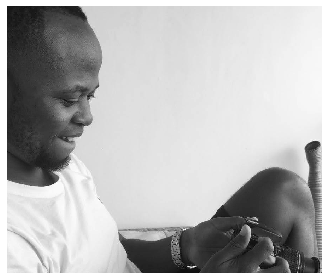

In [34]:
x =  imread(ipath,as_gray=True)
imshow(x)
plt.axis("off")
plt.tight_layout()

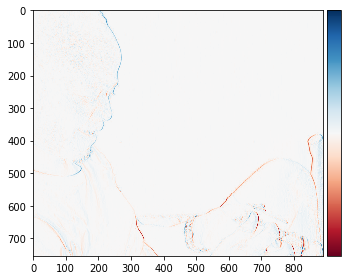

In [48]:
edges_prewitt_horizontal = prewitt_h(x)
edges_prewitt_vertical = prewitt_v(x)

imshow(edges_prewitt_vertical)
plt.axis("off")
plt.tight_layout()
plt.show()


In [15]:
x.mean(axis=2).ravel()

(4096,)

In [30]:
# We are applying a kernel to an image
kernel

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

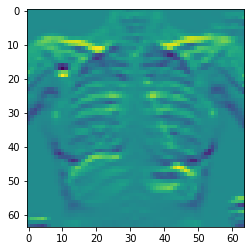

In [103]:
plt.imshow(convolve(im, kernel))

In [104]:
kernel =  np.array([[1,0,-1],[0,0,0],[-1,0,1]])

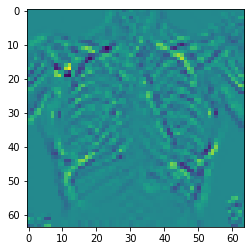

In [105]:
plt.imshow(convolve(im, kernel))

# working with edge detection kernels

In [106]:
# Load color image (BGR) and convert to gray
img = cv2.imread(ipath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [107]:
resized_image = cv2.resize(img_gray, (255, 255))

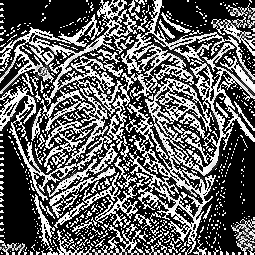

In [108]:
display(Image.fromarray(convolve(resized_image, kernel)))

In [109]:
kernel2 =  np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

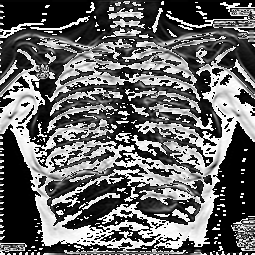

In [110]:
display(Image.fromarray(convolve(resized_image, kernel2)))

In [111]:
kernel3 =  np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

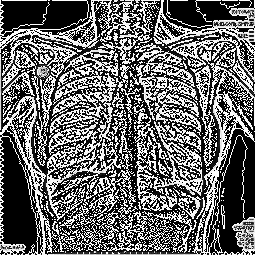

In [112]:
display(Image.fromarray(convolve(resized_image, kernel3)))

In [113]:
kernel4 =  np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

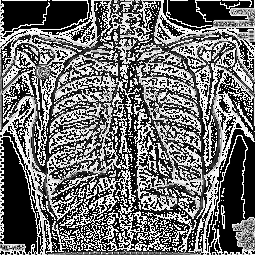

In [114]:
display(Image.fromarray(convolve(resized_image, kernel4)))

In [115]:
np.random.randint(9, size=(3, 3))

array([[6, 7, 3],
       [8, 5, 8],
       [6, 6, 2]])

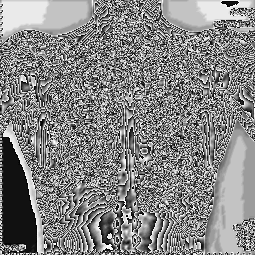

In [116]:
k =  np.random.randint(9, size=(3, 3))
display(Image.fromarray(convolve(resized_image, k)))

array([[3, 7, 6],
       [6, 4, 3],
       [4, 4, 4]])

In [144]:
# Load color image (BGR) and convert to gray
img = cv2.imread(ipath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

w =  120
resized_image = cv2.resize(img_gray, (64, 128))


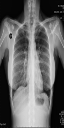

In [145]:
display(Image.fromarray(resized_image))

In [146]:
resized_image_scaled  = resized_image/255.0

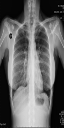

In [147]:
display(Image.fromarray(resized_image))

In [148]:
resized_image_scaled.shape

(128, 64)

In [150]:
# Calculate gradient
gx = cv2.Sobel(resized_image_scaled, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(resized_image_scaled, cv2.CV_32F, 0, 1, ksize=1)


error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-yaf6rry6/opencv/modules/imgproc/src/filter.simd.hpp:3021: error: (-213:The function/feature is not implemented) Unsupported combination of buffer format (=6), and destination format (=5) in function 'getLinearColumnFilter'


(299, 299)


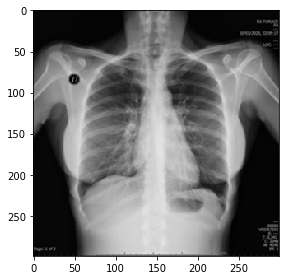

In [156]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread(ipath)
imshow(img)
print(img.shape)

(128, 64)


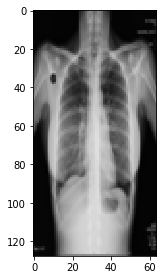

In [157]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [159]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

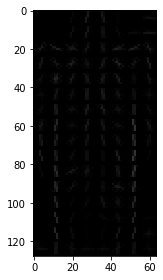

In [161]:
imshow(hog_image)

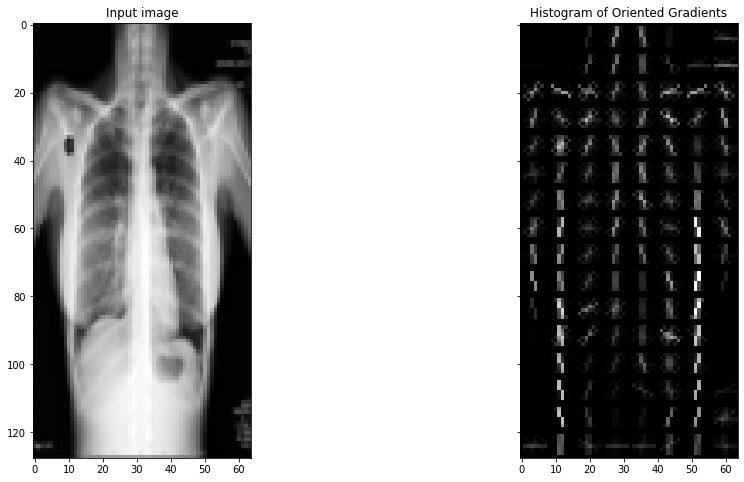

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [165]:
fd

array([0.20728891, 0.        , 0.        , ..., 0.0433939 , 0.08275665,
       0.21771233])

In [169]:
import pandas as pd

In [170]:
df =  pd.read_csv("coviddata.csv")

In [176]:
df.drop(columns=['path','imageid','mean','std','min','max'],axis=1,inplace=True)

In [187]:
plt.imshow(np.array(df.iloc[0,1]).astype('int32'))

ValueError: invalid literal for int() with base 10: '[[[ 1  1  1]\n  [ 2  2  2]\n  [ 2  2  2]\n  ...\n  [ 2  2  2]\n  [ 2  2  2]\n  [ 2  2  2]]\n\n [[ 1  1  1]\n  [ 2  2  2]\n  [ 2  2  2]\n  ...\n  [ 3  3  3]\n  [ 3  3  3]\n  [ 3  3  3]]\n\n [[ 1  1  1

In [192]:
np.array(df.iloc[0,1])

array('[[[ 1  1  1]\n  [ 2  2  2]\n  [ 2  2  2]\n  ...\n  [ 2  2  2]\n  [ 2  2  2]\n  [ 2  2  2]]\n\n [[ 1  1  1]\n  [ 2  2  2]\n  [ 2  2  2]\n  ...\n  [ 3  3  3]\n  [ 3  3  3]\n  [ 3  3  3]]\n\n [[ 1  1  1]\n  [ 2  2  2]\n  [ 2  2  2]\n  ...\n  [ 3  3  3]\n  [ 3  3  3]\n  [ 3  3  3]]\n\n ...\n\n [[16 16 16]\n  [26 26 26]\n  [26 26 26]\n  ...\n  [10 10 10]\n  [11 11 11]\n  [10 10 10]]\n\n [[14 14 14]\n  [22 22 22]\n  [22 22 22]\n  ...\n  [ 9  9  9]\n  [10 10 10]\n  [10 10 10]]\n\n [[10 10 10]\n  [16 16 16]\n  [16 16 16]\n  ...\n  [ 6  6  6]\n  [ 7  7  7]\n  [ 7  7  7]]]',
      dtype='<U521')

In [199]:
import ast
import numpy as np
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [204]:
from_np_array(df.iloc[0,1])

<ipython-input-199-22b17113cf0c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ast.literal_eval(array_string))


array([list([[1, 1, 1], [2, 2, 2], [2, 2, 2], Ellipsis, [2, 2, 2], [2, 2, 2], [2, 2, 2]]),
       list([[1, 1, 1], [2, 2, 2], [2, 2, 2], Ellipsis, [3, 3, 3], [3, 3, 3], [3, 3, 3]]),
       list([[1, 1, 1], [2, 2, 2], [2, 2, 2], Ellipsis, [3, 3, 3], [3, 3, 3], [3, 3, 3]]),
       Ellipsis,
       list([[16, 16, 16], [26, 26, 26], [26, 26, 26], Ellipsis, [10, 10, 10], [11, 11, 11], [10, 10, 10]]),
       list([[14, 14, 14], [22, 22, 22], [22, 22, 22], Ellipsis, [9, 9, 9], [10, 10, 10], [10, 10, 10]]),
       list([[10, 10, 10], [16, 16, 16], [16, 16, 16], Ellipsis, [6, 6, 6], [7, 7, 7], [7, 7, 7]])],
      dtype=object)

In [50]:
import pywt
import pywt.data

In [51]:
# Load image
original = pywt.data.camera()

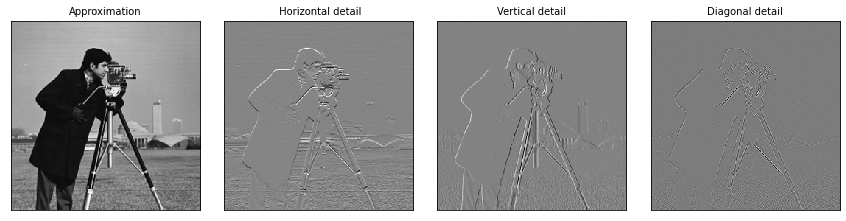

In [55]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


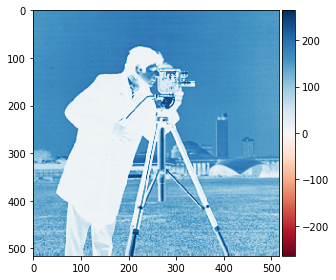

In [83]:
imshow(pywt.idwt2(coeffs2, 'haar'))